# Homework Assignment 3 (Individual)
## Simulating animal populations using OOP and ABM 
---

### <p style="text-align: right;"> &#9989; Put your name here.</p>

---
## Natural selection and adaptation

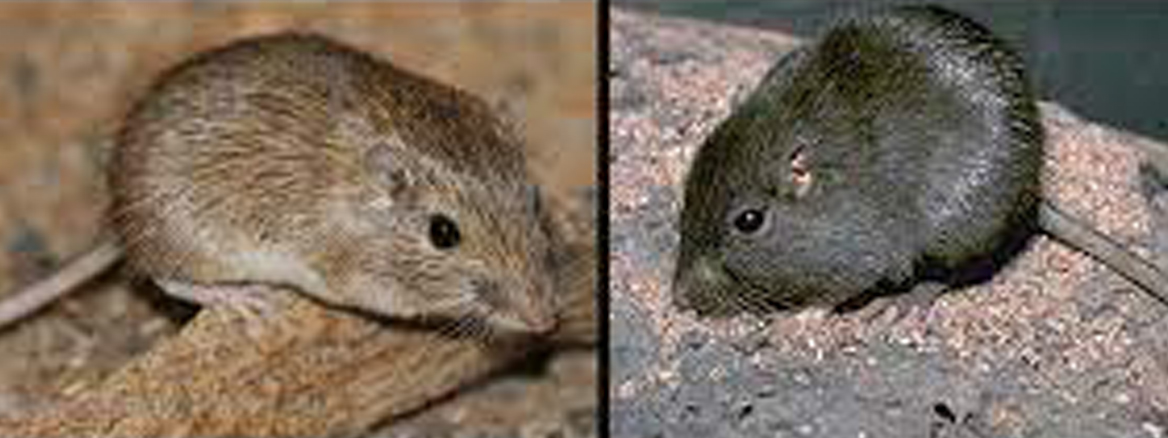

### Goal for this homework assignment
By now, you have learned OOP and ABM through the assignments of assembling Zoo and Superbugs, respectively. Let us use skills to build a simple fun model of natural selection. 

**This assignment is due roughly two weeks from now at 11:59 pm on Friday, March xx.** It should be uploaded into the "Homework Assignments" submission folder for Homework #3.  Submission instructions can be found at the end of the notebook. **The distribution of points can be found in the section headers**.

**After xxx change of their populations like the video at the link.**

---
## Part 1: Upload this file to your Git repository to track your progress on your assignment (5 points)

You will add this homework assignment to your GutHub repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `CMSE202/repositories/` repository and create a new directory called `hw-03`.
2. Move this notebook into that **new directory** in your repository, then **add** and **commit it**.
1. Finally, to test that everything is working, `git push` the file so that it ends up in your GitHub repository.

**Important**: Make sure to add your Professor and your TA as collaborators of this respository with "Read" access so that we can see your assignment (you should have done this in the previous homework assignment)

**Also**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the `CMSE202` repository inside the `hw-03` directory that you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It will be good to develop a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

**Do this**: Before you move on, clone your repository using the cell below.

In [ ]:
# Put the command for cloning your repository here!


---
## Part 2: Load necessary modules

Execute the next two Code cells to load python packages for math and visualization functions.

In [1]:
import random 
import numpy as np
import math
import matplotlib.pyplot as plt
import time  
from IPython.display import display, clear_output


**&#9989; Do This**: Download the image files of `M_light.png` and `M_dark.png` files and put them in the same folder as your notebook file.

The Code cell below is found online, which allows scatter plot to use image as the markers.

In [2]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', \
                            frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

---
## Part 3: Problem Statement

You are creating a simple ecosystem containing only two types of animals in the universe: mice and hawks.

1. **The universe is on a rock hill.** Let's set a boundary of this universe. ==> The domain of the world is $5 <x < 105$ and $5 < y < 105$.
1. **There are rock pocket mice.** ==> You will create two types of mouse objects.: male mouse (mickey) and female mouse (minnie).
1. **Each mouse has the following properties: location, age, alleles.** You will assign these properties to the mice objects.
1. **All mice have three functions: roaming, aging, and draw.**
1. **Female mice have one more function: litter.** 
1. **The preditors are hawks.** ==> You will create hawk objects. 
1. **Hawk objects have one property: location.**
1. **Hawk objects have two functions: roaming and hunt.**
1. **Note here** your main tasks are creating mice and hawk objects. The code to verify the created classes and run simulations is already functioning. No need to modify them. You are encouraged to take a look of those code to ensure your objects will be compatible with them before you create the objects.


dominant vs recessive

In [ ]:
### put your code of creating mickey object in this cell (5 pt)

class mickey():

    def __init__(self):
        self.x = random.randint(20, 120)
        self.y = random.randint(20, 120)
        
        self.age = 0
        self.gender = 'M'        

        
    def set_allele(self,allel_D,allel_M):
        self.allel_D = allel_D
        self.allel_M = allel_M
        
        if self.allel_D+self.allel_M >= 1:
            self.fur = 'light'
        else:
            self.fur = 'dark'       
        return
    

    def draw(self):
        if self.fur == 'light':
            image_path = 'M_light.png'
        else:
            image_path = 'M_dark.png'            
        imscatter(self.x, self.y, image_path, zoom=0.6)     
        return
    
    
    def roaming(self):   
        self.dx = random.randint(-10, 10)
        self.dy = random.randint(-10, 10)
       
        if ( self.x < 20 ):
            self.x = 20
            self.dx = abs(self.dx)
            
        if ( self.x > 120 ):
            self.x = 120
            self.dx = -abs(self.dx)  
   
        if ( self.y < 20 ):
            self.y = 20
            self.dy = abs(self.dy)
            
        if ( self.y > 120 ):
            self.y = 120
            self.dy = -abs(self.dy)
        
        self.x = self.x + self.dx
        self.y = self.y + self.dy
        return
        
    
    def aging(self):
        self.age += 1
        return
    

In [ ]:
test = mickey()
test.set_allele(random.randint(0, 1),random.randint(0, 1))
test.draw()


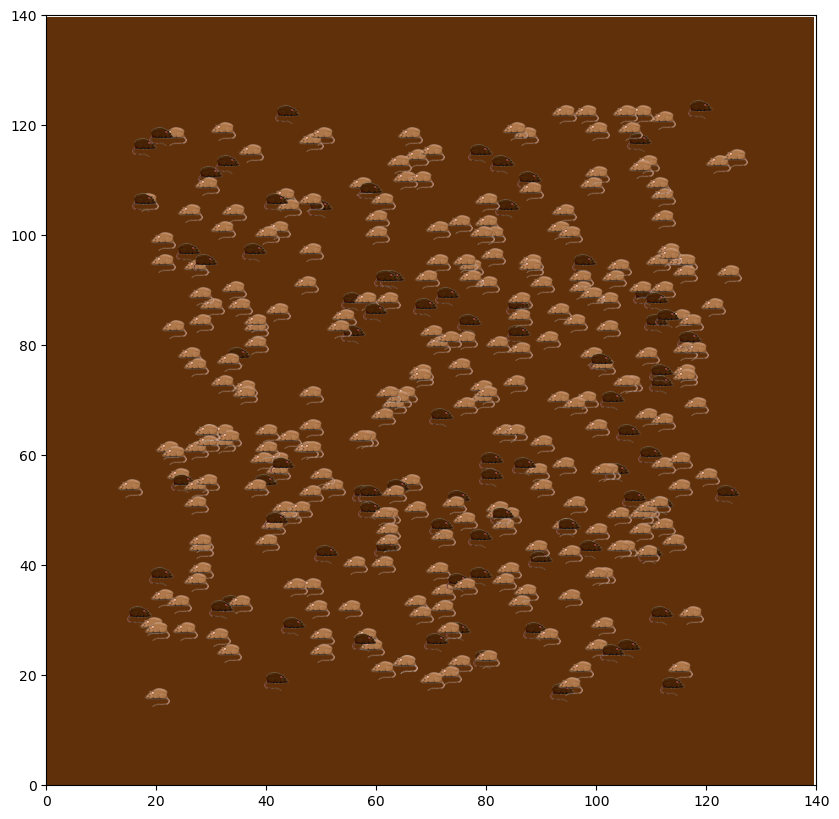

0 360 275 85 106 169 85


In [6]:
mischief = []

# for i in range(360):
#     mouse = mickey()
#     mouse.set_allele(random.randint(0, 1),random.randint(0, 1))
#     mischief.append(mouse)
    
for i in range(360):
    mouse = minnie()
    mouse.set_allele(random.randint(0, 1),random.randint(0, 1))
    mischief.append(mouse)    

## create a background of the prairie    
hill = np.zeros([140,140,3])
hill[:,:,0] = 0.38
hill[:,:,1] = 0.19
hill[:,:,2] = 0.04
    
# ## iterate over 40 time steps
for wk in range(1):
  
    # the next 2 lines are for plotting
    clear_output(wait=True)  
    plt.figure(figsize=(10, 10))    
    plt.imshow(hill)
    
    dm = 0
    dl = 0
    AA = 0
    Aa = 0
    aa = 0
    for ms in mischief:

        ms.roaming()
        ms.draw()
        
        if ms.fur == 'dark':
            dm += 1

        if ms.fur == 'light':
            dl += 1
    
    
        if ms.allel_D + ms.allel_M == 2:
            AA += 1
        elif ms.allel_D + ms.allel_M == 1:
            Aa += 1
        elif ms.allel_D + ms.allel_M == 0:
            aa += 1
            
# #     ## the next 5 lines are for plotting
    plt.xlim(0,140)
    plt.ylim(0,140)
    plt.show()   
    time.sleep(0.001)      
    
    
    print(wk,np.size(mischief), dl,dm, AA, Aa, aa)    

In [3]:
### put your code of creating mickey object in this cell (5 pt)

class minnie():

    def __init__(self):
        self.x = random.randint(20, 120)
        self.y = random.randint(20, 120)
        
        self.gender = 'F'
        self.age = 0
 

    def set_allele(self,allel_D,allel_M):
        self.allel_D = allel_D
        self.allel_M = allel_M
        
        if self.allel_D+self.allel_M >= 1:
            self.fur = 'light'
        else:
            self.fur = 'dark'       
        return
    

    def draw(self):
        if self.fur == 'light':
            image_path = 'M_light.png'
        else:
            image_path = 'M_dark.png'            
        imscatter(self.x, self.y, image_path, zoom=0.6)     
        return    
    
    
    def roaming(self):   
        self.dx = random.randint(-5, 5)
        self.dy = random.randint(-5, 5)
       
        if ( self.x < 20 ):
            self.x = 20
            self.dx = abs(self.dx)
            
        if ( self.x > 120 ):
            self.x = 120
            self.dx = -abs(self.dx)  
   
        if ( self.y < 20 ):
            self.y = 20
            self.dy = abs(self.dy)
            
        if ( self.y > 120 ):
            self.y = 120
            self.dy = -abs(self.dy)
        
        self.x = self.x + self.dx
        self.y = self.y + self.dy
        return
        
    
    def aging(self):
        self.age += 1
        return
 
    def mate_litter(self, male):
        m_x = male.x
        m_y = male.y
        m_D = male.allel_D
        m_M = male.allel_M 

        s_x = self.x
        s_y = self.y        
        s_D = self.allel_D
        s_M = self.allel_M  

        dst = math.sqrt((s_x-m_x)**2 + (s_y-m_y)**2)

        
        if dst <= 6:
            
            pup1 = mickey()
            pup1.set_allele(m_D,s_D)
            
            pup2 = mickey()
            pup2.set_allele(m_D,s_M)
 
            pup3 = minnie()
            pup3.set_allele(m_M,s_D)

            pup4 = minnie()
            pup4.set_allele(m_D,s_D)
            
            return [pup1, pup2, pup3, pup4]
            
        else:
            return []

        
        

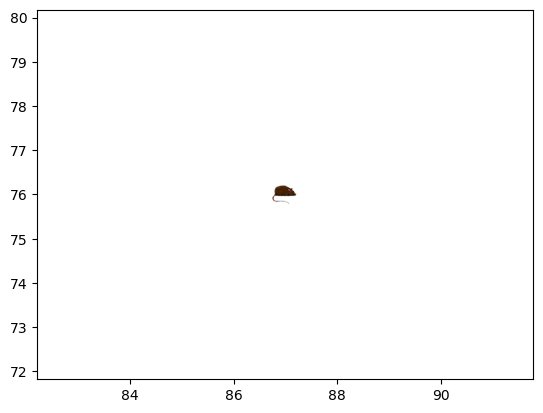

In [4]:
test2 = minnie()
test2.set_allele(random.randint(0, 1),random.randint(0, 1))
test2.draw()

In [ ]:
### put your code of creating mickey object in this cell (5 pt)

class hawk():

    def __init__(self):
        self.x = random.randint(20, 120)
        self.y = random.randint(20, 120)
        
    def roaming(self):   
        self.dx = random.randint(-15, 15)
        self.dy = random.randint(-15, 15)
       
        if ( self.x < 20 ):
            self.x = 20
            self.dx = abs(self.dx)
            
        if ( self.x > 120 ):
            self.x = 120
            self.dx = -abs(self.dx)  
   
        if ( self.y < 20 ):
            self.y = 20
            self.dy = abs(self.dy)
            
        if ( self.y > 120 ):
            self.y = 120
            self.dy = -abs(self.dy)
        
        self.x = self.x + self.dx
        self.y = self.y + self.dy
        return
    
    def draw(self):
        image_path = 'hawk.png'
        imscatter(self.x, self.y, image_path, zoom=0.8)       
        return
        
        
    def hunt(self,prey):
        
        p_x = prey.x
        p_y = prey.y
        
        h_x = self.x
        h_y = self.y
        
        dst = math.sqrt((h_x-p_x)**2 + (h_y-p_y)**2)

        if dst < 5:
            val = random.random()
            if prey.fur == 'light':
                if val < 0.4:
                    catch = 'Y'
                else:
                    catch = 'N' 
                
            if prey.fur == 'dark':
                catch = 'N'
#             else:
#                 catch = 'N'  
        else:
            catch = 'N'
#         catch = 'N'
            
        return catch      

In [ ]:
test3 = hawk()
test3.draw()

In [7]:
### run your roaming method 40 times

## initialize mice

mischief = []
for i in range(10):
    mouse = mickey()
    mouse.set_allele(random.randint(0, 1),random.randint(0, 1))
    mischief.append(mouse)

for i in range(10):
    mouse = minnie()
    mouse.set_allele(random.randint(0, 1),random.randint(0, 1))
    mischief.append(mouse)    

# kettles = [];
# for h in range(4):
#     bird = hawk()
#     kettles.append(bird)      
    
## create a background of the prairie    
hill = np.zeros([140,140,3])
hill[:,:,0] = 0.38
hill[:,:,1] = 0.19
hill[:,:,2] = 0.04


# ## iterate over 40 time steps
for wk in range(80):
  
    # the next 2 lines are for plotting
    clear_output(wait=True)  
    plt.figure(figsize=(10, 10))    
    plt.imshow(hill)


      
    ## call the roaming method and then draw here  

    n_misch = []
    for ms in mischief:
        
        ms.roaming()
        ms.draw()
        ms.aging()
        
        if ms.age >= 50:
            del ms
        else:
            n_misch.append(ms)
  
    mischief.clear
    mischief = n_misch
    
    
#     for hk in kettles:
#         hk.roaming()
#         hk.draw()

#     if np.size(mischief) > 0:
#         n_misch = []
#         for ms in mischief: 
#             for hk in kettles:
#                 catch = hk.hunt(ms)             
#                 if catch == 'Y':
#                     break
                    
#             if catch == 'Y':
#                 del ms
#             else:
#                 n_misch.append(ms)        
        
#         mischief.clear
#         mischief = n_misch
        
        
    neo = []  
    if np.mod(wk,13) == 0:
        for mf in mischief:
            if mf.gender == 'F':
                for mm in mischief:
                    if mm.gender == 'M':
                        output = mf.mate_litter(mm)    
                        if np.size(output) == 4:
                            break
                neo.extend(output[0:4])
    
    mischief.extend(neo)
    
        
    
# #     ## the next 5 lines are for plotting
    plt.xlim(0,140)
    plt.ylim(0,140)
    plt.show()   
    time.sleep(0.001)       
# # #     print(wk,np.size(mischief))
#     print(wk,np.size(mischief),np.size(n_misch),np.size(neo),catch)
    print(wk,np.size(mischief),np.size(n_misch),np.size(neo))






NameError: name 'mickey' is not defined

In [ ]:
np.size(mischief)


In [ ]:
np.size(neo)

In [ ]:
2**7


In [ ]:
for i in range(20):
    print(random.random())